## Crossword Generation using BlackSquare - Proto

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import puz
import unicodedata
import random
import time

from pprint import pprint
from tqdm import tqdm
from blacksquare import Crossword, BLACK, EMPTY, ACROSS, DOWN, DEFAULT_WORDLIST, Symmetry
from grid_generator_latest import generate_grid
from IPython.display import HTML

#### Generate grid of required size:

In [163]:
config = {
    'grid_size': 21, 
    'black_factor': 5,
    'display_grid': True,
    'temperature_randomness': 1.0
}

SYMMETRY_SETTING = {
    'diagonal': Symmetry.ROTATIONAL,
    'horizontal': Symmetry.HORIZONTAL,
    'vertical': Symmetry.VERTICAL
}

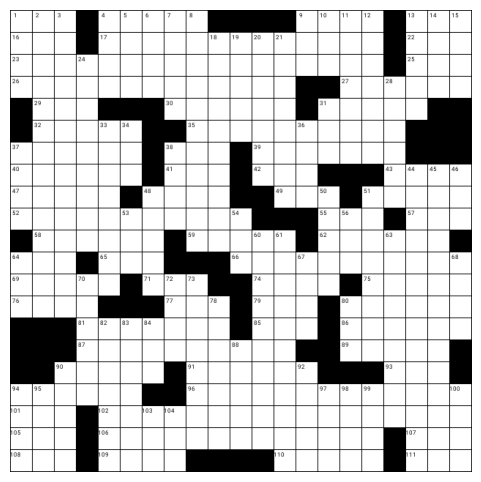

Symmetry:  diagonal


In [164]:
generated_grid_data, symmetry_info = generate_grid(config['grid_size'], b_factor = config['black_factor'], display_grid = config['display_grid'])

# get the black-cell positions for the crossword generation
row, col = generated_grid_data['size']['rows'], generated_grid_data['size']['cols']
grid_2d = [generated_grid_data['grid'][i:i+col] for i in range(0, len(generated_grid_data['grid']), col)]

print("Symmetry: ", symmetry_info)

In [165]:
black_cell_list = []

if symmetry_info == 'diagonal':
    for i in range(row):
        for j in range(col):
            if grid_2d[i][j] == '.':
                if not [row - 1 - i, col - 1 - j] in black_cell_list:
                    black_cell_list.append([i, j])
                    
elif symmetry_info == 'horizontal':
    for i in range(row):
        for j in range(col):
            if grid_2d[i][j] == '.':
                if [row - 1 - i, j] not in black_cell_list:
                    black_cell_list.append([i, j])
                    
elif symmetry_info == 'vertical':
    for i in range(row):
        for j in range(col):
            if grid_2d[i][j] == '.':
                if [i, col - 1 - j] not in black_cell_list:
                    black_cell_list.append([i, j])

In [168]:
xw = Crossword(config['grid_size'], symmetry = SYMMETRY_SETTING[symmetry_info], display_size_px = 600)

for cell in black_cell_list:
    xw[cell[0], cell[1]] = BLACK
    
grid = xw.fill(temperature = 1, timeout = 60.0)

# display the grid output
display(HTML(grid._grid_html()))
json_data = grid.get_json_data()

Output()

AttributeError: 'NoneType' object has no attribute '_grid_html'

In [ ]:
lines = open("./blacksquare/xwordlist.dict").read().splitlines()
all_answers_list = []
for line in lines:
    answer = line.split(';')[0].lower()
    if not any(char.isdigit() for char in answer):
        all_answers_list.append(answer)

#### Intersection between 'xwordlist' and 'our answer list'

In [ ]:
set_1 = set(our_answer_list)
set_2 = set(all_answers_list)

print(f"Intersection between two answer sets: {len(set_1.intersection(set_2))}")
print(f"Union between two answer sets: {len(set_1.union(set_2))}")

#### Answer Length Histogram Plot in 'Xwordlist'

In [ ]:
answer_len_dict = {}
for answer in all_answers_list:
    if len(answer) in answer_len_dict.keys():
        answer_len_dict[len(answer)] += 1
    else:
        answer_len_dict[len(answer)] = 0

array_2d = []
for answer_len, count in answer_len_dict.items():
    if answer_len < 25 and answer_len > 2:
        array_2d.append([answer_len, count])
    
array_2d.sort(key = lambda x: x[0])

array_2d = np.array(array_2d)

plt.figure(figsize = (10, 4))
plt.bar(array_2d[:, 0], array_2d[:, 1])
plt.xticks(array_2d[:, 0])
plt.show()

#### Handling Symmetric Crosswords

In [ ]:
from blacksquare import Crossword, BLACK, EMPTY, ACROSS, DOWN, DEFAULT_WORDLIST, WordIndex, WordList
from tqdm import tqdm
class SymmetricCrossword(Crossword):
    def set_word(self, word_index: WordIndex, value: str) -> None:
        super().set_word(word_index, value)
        super().set_word(self.get_symmetric_word_index(word_index), value[::-1])

emordilaps = {}
for word, score in tqdm(DEFAULT_WORDLIST):
    reverse_score = DEFAULT_WORDLIST.get_score(word[::-1])
    if reverse_score:
        emordilaps[word] = min(score, reverse_score)
emordilaps_wordlist = WordList(emordilaps)

# Now just construct the puzzle and fill!
xw = SymmetricCrossword(7, display_size_px = 200)

filled = [
    (0, 5), (0, 6), (1, 6), (3, 3)
]

# filled = [
#  (0, 4), (0, 5), (0, 11), (1, 4), (1, 5), (1, 11),
#     (2, 4), (2, 11), (3, 4), (3, 9), (4, 0), (4, 1), (4, 2),
#     (4, 7), (4, 8), (4, 14), (5, 6), (5, 12), (5, 13), (5, 14), 
#     (6, 5), (6, 10), (7, 3),
# ]

for i in filled:
    xw[i] = BLACK
xw.fill(emordilaps_wordlist)